## Assignment 1
Changcheng Yuan
UIN:535005117

First we set up the environment, import the packages and import the dataset. Note that Keras starts with supporting multiple backend framework like Therano and CNTK, but for recent Keras version, only Tensorflow is supported.

In [87]:
import os
from IPython.core.magic import register_cell_magic

os.environ["KERAS_BACKEND"] = "tensorflow"

In [88]:
#Load the MNIST dataset
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Training data shape:", train_images.shape, train_labels.shape)
print("Testing data shape:", test_images.shape, test_labels.shape)

Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


In [89]:
# Reshape the images to (num_samples, 28*28) and normalize pixel values to [0, 1]
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

print("Training data shape after reshaping and normalization:", train_images.shape, train_labels.shape)
print("Testing data shape after reshaping and normalization:", test_images.shape, test_labels.shape)

Training data shape after reshaping and normalization: (60000, 784) (60000,)
Testing data shape after reshaping and normalization: (10000, 784) (10000,)


Now we create a baseline deep learning pipeline to get the accuracy for s simple dense network.

In [90]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [91]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [92]:
model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
    verbose=1
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9264 - loss: 0.2622
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1052
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0693
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9857 - loss: 0.0499
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9892 - loss: 0.0368


For Question 1:

> For the neural network in the Jupiter notebook for the MNIST task (which has 2 layers, where the first layer has 512 neurons and the second layer has 10 neurons), adjust the size of the first layer (namely, the number of neurons in the first layer) as: 16, 32, 64, 128, 256, 512. For each size, train the neural network and record its test accuracy (namely, accuracy on the test set). Draw a figure, where the x-axis is the size of the first layer, and the y-axis is the test accuracy. Submit your figure. 


In [93]:
def evaluate_model_1st_layer_size(layer_size):
    model = keras.Sequential(
        [
            layers.Dense(layer_size, activation="relu"),
            layers.Dense(10, activation="softmax")
        ]
    )
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    model.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=128,
        verbose=0 
    )

    train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return train_loss, train_acc, test_loss, test_acc

In [94]:
layer_size_list = [16, 32, 64, 128, 256, 512]
train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
for size in layer_size_list:
    train_loss, train_acc, test_loss, test_acc = evaluate_model_1st_layer_size(size)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_acc)

print("Layer sizes:", layer_size_list)
print("Train losses:", train_loss_list)
print("Train accuracies:", train_accuracy_list)
print("Test losses:", test_loss_list)
print("Test accuracies:", test_accuracy_list)

Layer sizes: [16, 32, 64, 128, 256, 512]
Train losses: [0.17409777641296387, 0.08784574270248413, 0.049299146980047226, 0.024047281593084335, 0.012405924499034882, 0.010102620348334312]
Train accuracies: [0.9510166645050049, 0.9753999710083008, 0.986549973487854, 0.9945666790008545, 0.9973499774932861, 0.9974333047866821]
Test losses: [0.1924397498369217, 0.11260785907506943, 0.08637005090713501, 0.07575281709432602, 0.06995416432619095, 0.06748824566602707]
Test accuracies: [0.9455999732017517, 0.9666000008583069, 0.9739000201225281, 0.9761999845504761, 0.9805999994277954, 0.9793000221252441]


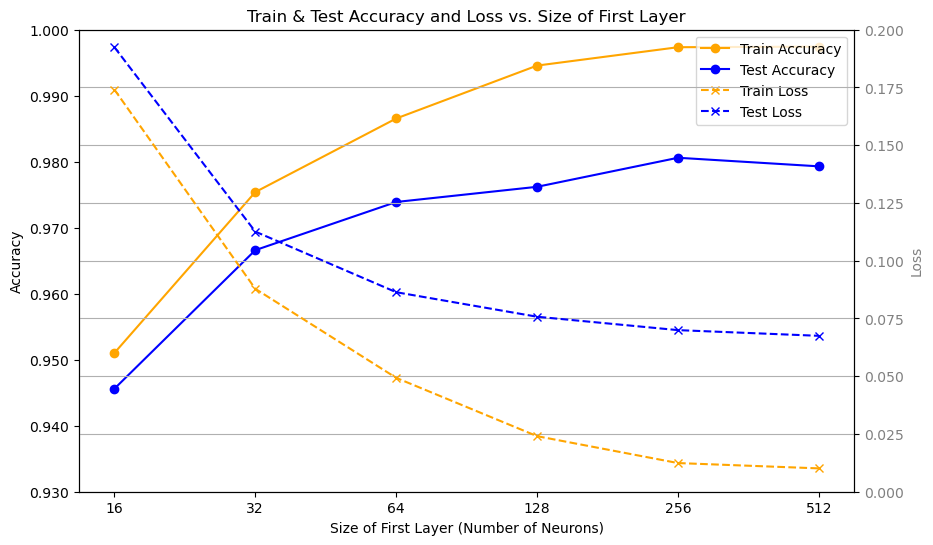

In [95]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Accuracy lines
ax1.plot(layer_size_list, train_accuracy_list, marker='o', color='orange', label='Train Accuracy')
ax1.plot(layer_size_list, test_accuracy_list, marker='o', color='blue', label='Test Accuracy')
ax1.set_xlabel('Size of First Layer (Number of Neurons)')
ax1.set_ylabel('Accuracy', color='black')
ax1.set_ylim(0.93, 1.0)
ax1.set_yticks([round(x, 3) for x in ax1.get_yticks()])
ax1.set_yticklabels([f"{x:.3f}" for x in ax1.get_yticks()])
ax1.tick_params(axis='y', labelcolor='black')

# Loss lines (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(layer_size_list, train_loss_list, marker='x', color='orange', linestyle='dashed', label='Train Loss')
ax2.plot(layer_size_list, test_loss_list, marker='x', color='blue', linestyle='dashed', label='Test Loss')
ax2.set_ylabel('Loss', color='gray')
ax2.set_ylim(0, max(max(train_loss_list), max(test_loss_list)))
ax2.set_yticks([round(x, 3) for x in ax2.get_yticks()])
ax2.set_yticklabels([f"{x:.3f}" for x in ax2.get_yticks()])
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.xscale('log', base=2)
plt.title('Train & Test Accuracy and Loss vs. Size of First Layer')
plt.grid(True)
plt.xticks(layer_size_list, layer_size_list)
plt.show()

For Question2:

> For the neural network in the Jupiter notebook for the MNIST task (which has 2 layers, where the first layer has 512 neurons and the second layer has 10 neurons), adjust the number of layers to be: 2, 3, 4, 5. (The last layer has to have size 10 since we have 10 classes. But you can decide on the sizes of the other layers.) For each case, train the neural network and record its test accuracy. Draw a figure, where the x-axis is the number of layers, and the y-axis is the test accuracy. Submit your figure, and specify the sizes of your layers for each case. 

In [96]:
def evaluate_model_num_layer(num_dense_layer, layer_size_list):
    if num_dense_layer < 1:
        raise ValueError("Number of dense layers must be at least 1.")
    if len(layer_size_list) != num_dense_layer:
        raise ValueError("Length of layer_size_list must match num_dense_layer.")

    # Build the model layers
    model_layers = []
    for size in layer_size_list:
        model_layers.append(layers.Dense(size, activation="relu"))
    # Last layer: always size 10 for MNIST classification output
    model_layers.append(layers.Dense(10, activation="softmax"))

    model = keras.Sequential(model_layers)
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    model.fit(
        train_images,
        train_labels,
        epochs=10,
        batch_size=128,
        verbose=0
    )

    # Evaluate on train and test sets
    train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=0)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    return train_loss, train_acc, test_loss, test_acc

### Case 1

For different number of layers experiment, we first tried the case where every layer has the same size of 128 neuron. Because for single layer, we can see 128 neuron can learn to classify without overfitting. We can see that increasing number of layers increased the test accuracy when we go from 1 layer to 2 layers. However, further increasing layers does not yield test loss decrease and accuracy gain. 

In [97]:
uniform_layer_size = 128
layer_count_list = [1,2,3,4,5]

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []

for num_layers in layer_count_list:
    layer_sizes = [uniform_layer_size] * (num_layers)
    train_loss, train_acc, test_loss, test_acc = evaluate_model_num_layer(num_layers, layer_sizes)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_acc)

print("Number of Layers:", layer_count_list)
print("Train losses:", train_loss_list)
print("Train accuracies:", train_accuracy_list)
print("Test losses:", test_loss_list)
print("Test accuracies:", test_accuracy_list)  


Number of Layers: [1, 2, 3, 4, 5]
Train losses: [0.02544594183564186, 0.017986971884965897, 0.018506338819861412, 0.01539561990648508, 0.024533944204449654]
Train accuracies: [0.9939000010490417, 0.9943000078201294, 0.9939833283424377, 0.9948833584785461, 0.9921833276748657]
Test losses: [0.07555080205202103, 0.08683208376169205, 0.08746123313903809, 0.08807948976755142, 0.0974021628499031]
Test accuracies: [0.9768999814987183, 0.9764999747276306, 0.9775000214576721, 0.9778000116348267, 0.9763000011444092]


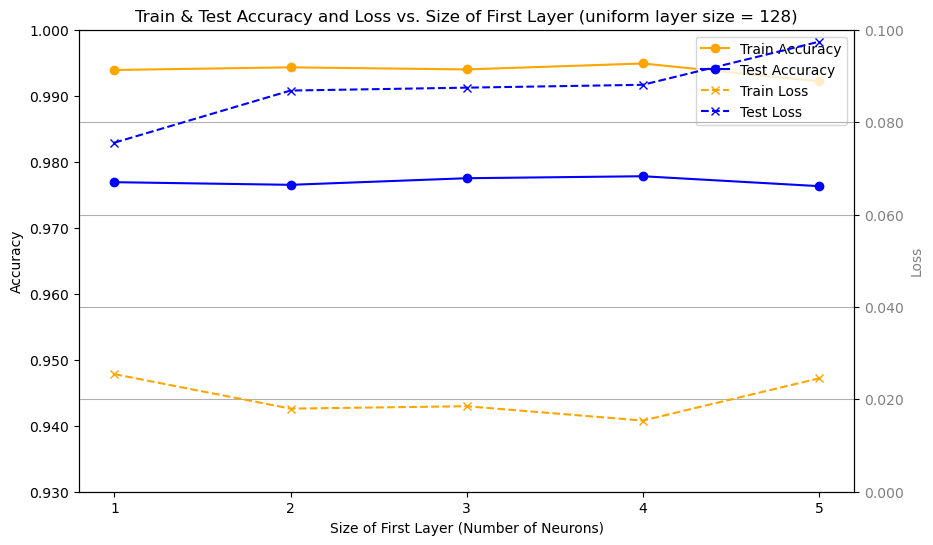

In [98]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Accuracy lines
ax1.plot(layer_count_list, train_accuracy_list, marker='o', color='orange', label='Train Accuracy')
ax1.plot(layer_count_list, test_accuracy_list, marker='o', color='blue', label='Test Accuracy')
ax1.set_xlabel('Size of First Layer (Number of Neurons)')
ax1.set_ylabel('Accuracy', color='black')
ax1.set_ylim(0.93, 1.0)
ax1.set_yticks([round(x, 3) for x in ax1.get_yticks()])
ax1.set_yticklabels([f"{x:.3f}" for x in ax1.get_yticks()])
ax1.tick_params(axis='y', labelcolor='black')

# Loss lines (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(layer_count_list, train_loss_list, marker='x', color='orange', linestyle='dashed', label='Train Loss')
ax2.plot(layer_count_list, test_loss_list, marker='x', color='blue', linestyle='dashed', label='Test Loss')
ax2.set_ylabel('Loss', color='gray')
ax2.set_ylim(0, max(max(train_loss_list), max(test_loss_list)))
ax2.set_yticks([round(x, 3) for x in ax2.get_yticks()])
ax2.set_yticklabels([f"{x:.3f}" for x in ax2.get_yticks()])
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title(f'Train & Test Accuracy and Loss vs. Size of First Layer (uniform layer size = {uniform_layer_size})')
plt.grid(True)
plt.xticks(layer_count_list, layer_count_list)
plt.show()

### Case 2

For different number of layers experiment, we then tried the case where every layer has the same size of 64 neuron. We can see that increasing number of layers for small layer with less learning capability does not bring in any advantage.

In [99]:
uniform_layer_size = 64
layer_count_list = [1,2,3,4,5]

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []

for num_layers in layer_count_list:
    layer_sizes = [uniform_layer_size] * (num_layers)
    train_loss, train_acc, test_loss, test_acc = evaluate_model_num_layer(num_layers, layer_sizes)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_acc)

print("Number of Layers:", layer_count_list)
print("Train losses:", train_loss_list)
print("Train accuracies:", train_accuracy_list)
print("Test losses:", test_loss_list)
print("Test accuracies:", test_accuracy_list)  

Number of Layers: [1, 2, 3, 4, 5]
Train losses: [0.050366319715976715, 0.0372922308743, 0.03189750388264656, 0.028729459270834923, 0.0490240603685379]
Train accuracies: [0.98580002784729, 0.9883666634559631, 0.989799976348877, 0.9912166595458984, 0.9829833507537842]
Test losses: [0.08967606723308563, 0.09245505183935165, 0.0977330207824707, 0.09786567091941833, 0.13211168348789215]
Test accuracies: [0.9735000133514404, 0.972000002861023, 0.9743000268936157, 0.9757000207901001, 0.9642999768257141]


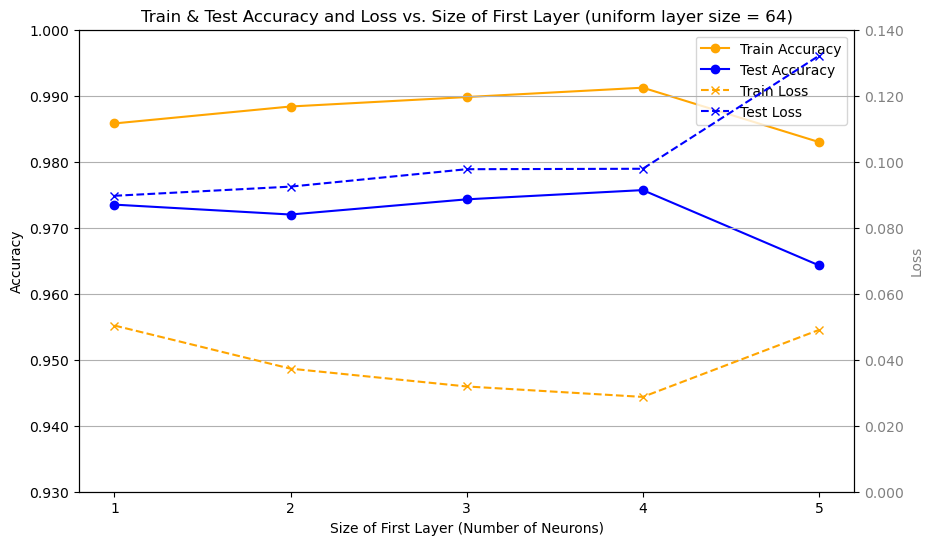

In [100]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Accuracy lines
ax1.plot(layer_count_list, train_accuracy_list, marker='o', color='orange', label='Train Accuracy')
ax1.plot(layer_count_list, test_accuracy_list, marker='o', color='blue', label='Test Accuracy')
ax1.set_xlabel('Size of First Layer (Number of Neurons)')
ax1.set_ylabel('Accuracy', color='black')
ax1.set_ylim(0.93, 1.0)
ax1.set_yticks([round(x, 3) for x in ax1.get_yticks()])
ax1.set_yticklabels([f"{x:.3f}" for x in ax1.get_yticks()])
ax1.tick_params(axis='y', labelcolor='black')

# Loss lines (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(layer_count_list, train_loss_list, marker='x', color='orange', linestyle='dashed', label='Train Loss')
ax2.plot(layer_count_list, test_loss_list, marker='x', color='blue', linestyle='dashed', label='Test Loss')
ax2.set_ylabel('Loss', color='gray')
ax2.set_ylim(0, max(max(train_loss_list), max(test_loss_list)))
ax2.set_yticks([round(x, 3) for x in ax2.get_yticks()])
ax2.set_yticklabels([f"{x:.3f}" for x in ax2.get_yticks()])
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title(f'Train & Test Accuracy and Loss vs. Size of First Layer (uniform layer size = {uniform_layer_size})')
plt.grid(True)
plt.xticks(layer_count_list, layer_count_list)
plt.show()

### Case 3

In Case 3, we experimented with varying the sizes of each layer, using a decreasing sequence: [128, 64, 32, 16]. For each number of layers from 1 to 4, we used the first N sizes from this list. This approach tests whether gradually reducing the number of neurons in deeper layers affects performance.

From the plot, we observe that increasing the number of layers with decreasing sizes does not consistently improve test accuracy. While the model with more layers can potentially capture more complex patterns, reducing the layer size too quickly may limit the network’s learning capacity. As a result, the test accuracy does not show significant improvement, and in some cases, may even decrease. This suggests that both the number of layers and their sizes need to be balanced for optimal performance.

In [101]:
max_layer_sizes = [128, 64, 32, 16]
layer_count_list = [1,2,3,4]

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []

for num_layers in layer_count_list:
    layer_sizes = max_layer_sizes[:num_layers]
    train_loss, train_acc, test_loss, test_acc = evaluate_model_num_layer(num_layers, layer_sizes)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_acc)

print("Number of Layers:", layer_count_list)
print("Train losses:", train_loss_list)
print("Train accuracies:", train_accuracy_list)
print("Test losses:", test_loss_list)
print("Test accuracies:", test_accuracy_list)  

Number of Layers: [1, 2, 3, 4]
Train losses: [0.026280462741851807, 0.016763972118496895, 0.017255842685699463, 0.018855296075344086]
Train accuracies: [0.9937499761581421, 0.9953333139419556, 0.9944333434104919, 0.9935833215713501]
Test losses: [0.079058438539505, 0.07760392129421234, 0.0819692462682724, 0.09003986418247223]
Test accuracies: [0.9746000170707703, 0.9765999913215637, 0.9782000184059143, 0.9761000275611877]


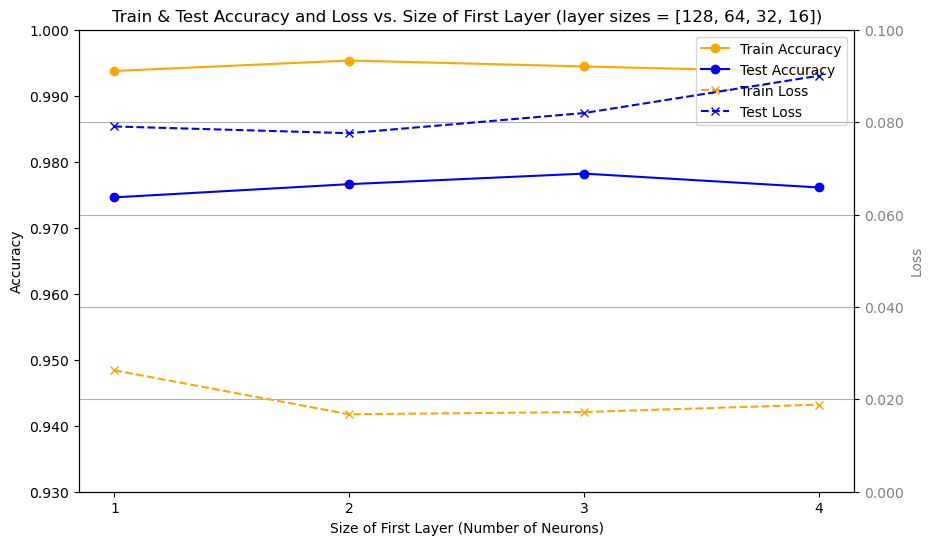

In [102]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Accuracy lines
ax1.plot(layer_count_list, train_accuracy_list, marker='o', color='orange', label='Train Accuracy')
ax1.plot(layer_count_list, test_accuracy_list, marker='o', color='blue', label='Test Accuracy')
ax1.set_xlabel('Size of First Layer (Number of Neurons)')
ax1.set_ylabel('Accuracy', color='black')
ax1.set_ylim(0.93, 1.0)
ax1.set_yticks([round(x, 3) for x in ax1.get_yticks()])
ax1.set_yticklabels([f"{x:.3f}" for x in ax1.get_yticks()])
ax1.tick_params(axis='y', labelcolor='black')

# Loss lines (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(layer_count_list, train_loss_list, marker='x', color='orange', linestyle='dashed', label='Train Loss')
ax2.plot(layer_count_list, test_loss_list, marker='x', color='blue', linestyle='dashed', label='Test Loss')
ax2.set_ylabel('Loss', color='gray')
ax2.set_ylim(0, max(max(train_loss_list), max(test_loss_list)))
ax2.set_yticks([round(x, 3) for x in ax2.get_yticks()])
ax2.set_yticklabels([f"{x:.3f}" for x in ax2.get_yticks()])
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title(f'Train & Test Accuracy and Loss vs. Size of First Layer (layer sizes = {max_layer_sizes})')
plt.grid(True)
plt.xticks(layer_count_list, layer_count_list)
plt.show()

### Case 4

In Case 4, we tested increasing layer sizes with each additional layer, using the sequence [32, 64, 128, 256]. For each number of layers from 1 to 4, we used the first N sizes from this list. This setup explores whether expanding the network’s capacity in deeper layers improves performance.

From the plot, we see that increasing the number of layers and their sizes can help the model learn more complex representations, which may lead to higher training accuracy. However, the test accuracy does not always improve proportionally and may plateau or even decrease if the model becomes too complex, potentially leading to overfitting. This result highlights the importance of balancing model capacity and complexity to achieve optimal generalization on unseen data.

In [103]:
max_layer_sizes = [32, 64, 128, 256]
layer_count_list = [1,2,3,4]

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []

for num_layers in layer_count_list:
    layer_sizes = max_layer_sizes[:num_layers]
    train_loss, train_acc, test_loss, test_acc = evaluate_model_num_layer(num_layers, layer_sizes)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_acc)

print("Number of Layers:", layer_count_list)
print("Train losses:", train_loss_list)
print("Train accuracies:", train_accuracy_list)
print("Test losses:", test_loss_list)
print("Test accuracies:", test_accuracy_list)  

Number of Layers: [1, 2, 3, 4]
Train losses: [0.0898958221077919, 0.061152372509241104, 0.04215331748127937, 0.038933295756578445]
Train accuracies: [0.9743499755859375, 0.9817333221435547, 0.9871833324432373, 0.9875666499137878]
Test losses: [0.12117654085159302, 0.10526558756828308, 0.10534942895174026, 0.09800887107849121]
Test accuracies: [0.9634000062942505, 0.9668999910354614, 0.9692999720573425, 0.9700000286102295]


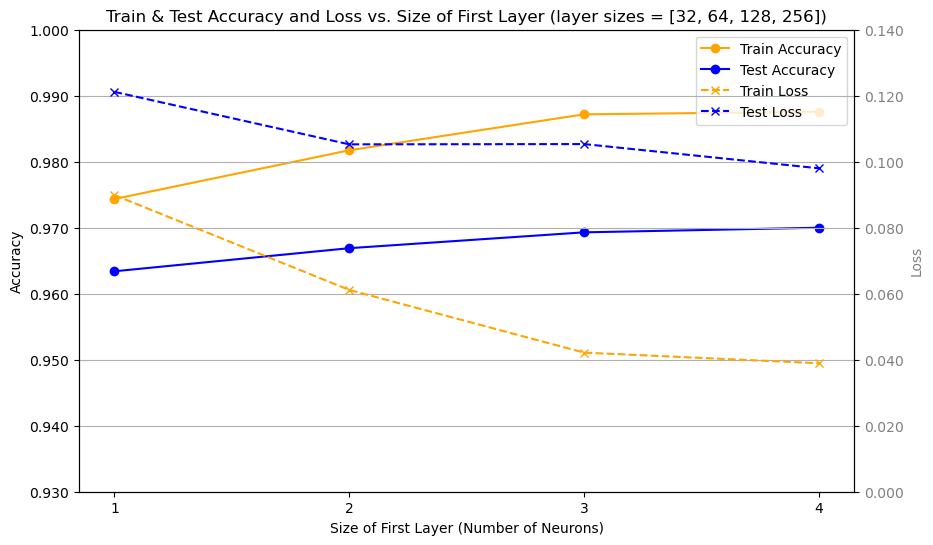

In [104]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Accuracy lines
ax1.plot(layer_count_list, train_accuracy_list, marker='o', color='orange', label='Train Accuracy')
ax1.plot(layer_count_list, test_accuracy_list, marker='o', color='blue', label='Test Accuracy')
ax1.set_xlabel('Size of First Layer (Number of Neurons)')
ax1.set_ylabel('Accuracy', color='black')
ax1.set_ylim(0.93, 1.0)
ax1.set_yticks([round(x, 3) for x in ax1.get_yticks()])
ax1.set_yticklabels([f"{x:.3f}" for x in ax1.get_yticks()])
ax1.tick_params(axis='y', labelcolor='black')

# Loss lines (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(layer_count_list, train_loss_list, marker='x', color='orange', linestyle='dashed', label='Train Loss')
ax2.plot(layer_count_list, test_loss_list, marker='x', color='blue', linestyle='dashed', label='Test Loss')
ax2.set_ylabel('Loss', color='gray')
ax2.set_ylim(0, max(max(train_loss_list), max(test_loss_list)))
ax2.set_yticks([round(x, 3) for x in ax2.get_yticks()])
ax2.set_yticklabels([f"{x:.3f}" for x in ax2.get_yticks()])
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title(f'Train & Test Accuracy and Loss vs. Size of First Layer (layer sizes = {max_layer_sizes})')
plt.grid(True)
plt.xticks(layer_count_list, layer_count_list)
plt.show()

### Case 5:

In Case 5, we performed an exhaustive search to find the optimal multi-layer dense network architecture. Starting with the best first layer size (128), we systematically tested various sizes for additional layers, only adding a new layer if it improved the test accuracy. This approach ensures that the network is not unnecessarily deep or complex, and that each added layer contributes to better performance.

From the results, we observed that after a certain point, adding more layers did not lead to further improvements in accuracy. The search algorithm stopped when no candidate layer size could increase the test accuracy, returning the best-performing layer size configuration. This demonstrates the importance of balancing model complexity and performance, and shows that deeper networks are not always better for a given task.

In [105]:
def exhaustive_search_best_layer_sizes(
    first_layer_size=128,
    candidate_sizes=[16, 32, 64, 128, 256, 512],
    max_layers=5
):
    # Start with the best first layer size
    best_sizes = [first_layer_size]
    best_acc = None

    # Evaluate single layer
    _, _, _, acc = evaluate_model_num_layer(1, best_sizes)
    best_acc = acc

    for layer_num in range(2, max_layers + 1):
        improved = False
        best_next_size = None
        best_next_acc = best_acc

        for size in candidate_sizes:
            test_sizes = best_sizes + [size]
            _, _, _, acc = evaluate_model_num_layer(layer_num, test_sizes)
            if acc > best_next_acc:
                best_next_acc = acc
                best_next_size = size
                improved = True

        if improved:
            best_sizes.append(best_next_size)
            best_acc = best_next_acc
        else:
            break

    return best_sizes

best_layer_sizes = exhaustive_search_best_layer_sizes()
print("Best layer sizes:", best_layer_sizes)

Best layer sizes: [128, 32]


In [106]:
max_layer_sizes = best_layer_sizes
layer_count_list = list(range(1, len(max_layer_sizes) + 1))

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []

for num_layers in layer_count_list:
    layer_sizes = max_layer_sizes[:num_layers]
    train_loss, train_acc, test_loss, test_acc = evaluate_model_num_layer(num_layers, layer_sizes)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_acc)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_acc)

print("Number of Layers:", layer_count_list)
print("Train losses:", train_loss_list)
print("Train accuracies:", train_accuracy_list)
print("Test losses:", test_loss_list)
print("Test accuracies:", test_accuracy_list)  

Number of Layers: [1, 2]
Train losses: [0.024637697264552116, 0.01853407546877861]
Train accuracies: [0.9939500093460083, 0.9949333071708679]
Test losses: [0.06962457299232483, 0.08111170679330826]
Test accuracies: [0.9775999784469604, 0.9764000177383423]


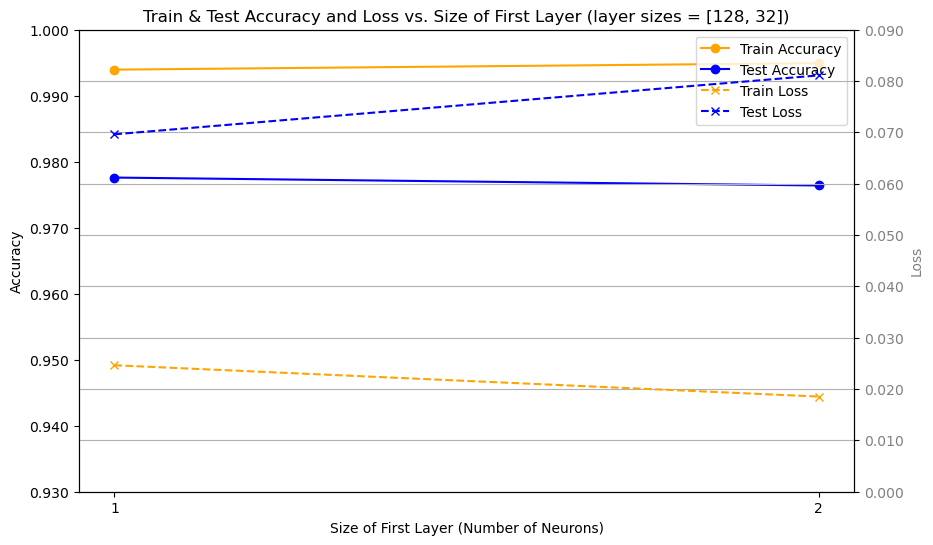

In [107]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Accuracy lines
ax1.plot(layer_count_list, train_accuracy_list, marker='o', color='orange', label='Train Accuracy')
ax1.plot(layer_count_list, test_accuracy_list, marker='o', color='blue', label='Test Accuracy')
ax1.set_xlabel('Size of First Layer (Number of Neurons)')
ax1.set_ylabel('Accuracy', color='black')
ax1.set_ylim(0.93, 1.0)
ax1.set_yticks([round(x, 3) for x in ax1.get_yticks()])
ax1.set_yticklabels([f"{x:.3f}" for x in ax1.get_yticks()])
ax1.tick_params(axis='y', labelcolor='black')

# Loss lines (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(layer_count_list, train_loss_list, marker='x', color='orange', linestyle='dashed', label='Train Loss')
ax2.plot(layer_count_list, test_loss_list, marker='x', color='blue', linestyle='dashed', label='Test Loss')
ax2.set_ylabel('Loss', color='gray')
ax2.set_ylim(0, max(max(train_loss_list), max(test_loss_list)))
ax2.set_yticks([round(x, 3) for x in ax2.get_yticks()])
ax2.set_yticklabels([f"{x:.3f}" for x in ax2.get_yticks()])
ax2.tick_params(axis='y', labelcolor='gray')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title(f'Train & Test Accuracy and Loss vs. Size of First Layer (layer sizes = {max_layer_sizes})')
plt.grid(True)
plt.xticks(layer_count_list, layer_count_list)
plt.show()